In [1]:
import pandas as pd

from route_66.visualisation import plot_simulation, plot_batch_run

# Simulational Analysis
Jupyter Notebook for the assignment 'Touring Machines' for the course Simulation Tooling for the bachelor programme Artificial Intelligence at the HU University of Applied Sciences Utrecht

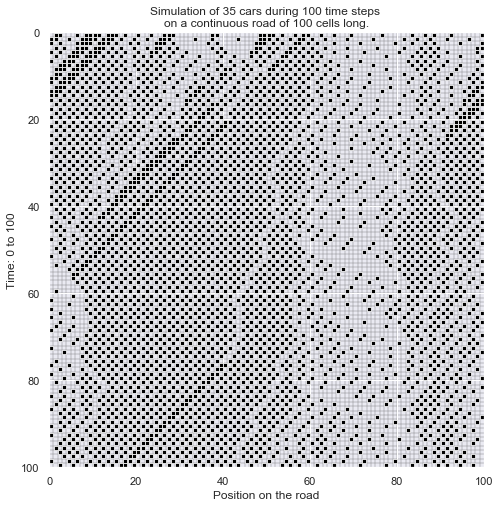

In [2]:
plot_simulation(100, 35, length=100, p=0.3, grid=True)

## Analysis
### Plot
Plot containing boxplots visualising the effects of timer length and initial number of cars on average velocity:

360it [00:33, 10.82it/s]


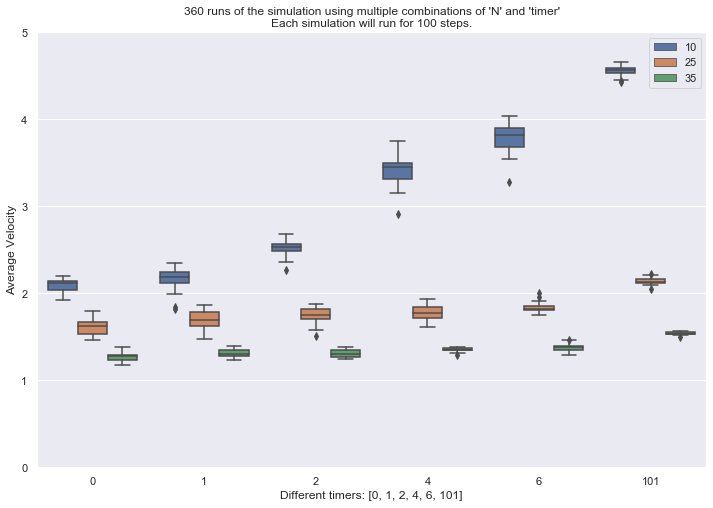

In [3]:
data = plot_batch_run(N=[10, 25, 35], timer=[0, 1, 2, 4, 6, 101], iterations=20)

### Using Pandas


In [4]:
# Drop Run, length and lanes, and group Dataframe by initial cars on road 
N_data = data[["timer", "N", "Average Velocity", "Standard Deviation"]].groupby("N")

# For each group, split from dataframe, group by timer, find mean for velocity and STD, sort by Average velocity
timer_data = [N_data.get_group(x).groupby("timer").mean().sort_values("Average Velocity", ascending=False) for x in N_data.groups]
print(timer_data[0])

        N  Average Velocity  Standard Deviation
timer                                          
101    10          4.554600            0.703882
6      10          3.788904            1.348163
4      10          3.397958            1.542924
2      10          2.521251            1.710470
1      10          2.165021            1.657285
0      10          2.081767            1.690148


In [5]:
mean_data = pd.concat(timer_data)
mean_data

,N,Average Velocity,Standard Deviation
timer,,,
101,10,4.554600,0.703882
6,10,3.788904,1.348163
4,10,3.397958,1.542924
2,10,2.521251,1.710470
1,10,2.165021,1.657285
0,10,2.081767,1.690148
101,25,2.140740,1.275851
6,25,1.839667,1.244406
4,25,1.777167,1.258148


For each variation of N, the timer with a length of 6 grants the greatest average average velocity. It usually also grants a lower or the lowest average standard deviation for its N.   

The greater the amount of initial cars, the lesser the impact of timer length. 